# 환율

#### !pip install finance-datareader

* 종목 코드
  - 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500
* 가격 데이터
  - 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
  - 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
  - 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
  - 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
  - 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)
  
* ref : https://www.facebook.com/financedata    

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (14,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [3]:
# import matplotlib.font_manager as fm
# import matplotlib as mpl
# mpl.rcParams['axes.unicode_minus'] = False

# mpl.rcParams["figure.figsize"] = (14,4)
# mpl.rcParams['axes.grid'] = True 

# path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)

In [4]:
# ydf = pd.read_csv('./datasets/exchange_rate/년도_부채자산.csv', thousands = ',' )
ymdf = pd.read_csv('./datasets/exchange_rate/년월_환율관련자료.csv', thousands = ',' )
# qdf = pd.read_csv('./datasets/exchange_rate/분기_외국인투자.csv', thousands = ',' )
# df18 = pd.read_csv('./datasets/exchange_rate/ECOS18_외환.csv', thousands = ',' )
# df1612 = pd.read_csv('./datasets/exchange_rate/ECOS18_외환1621.csv', thousands = ',' )
df = pd.read_csv('./datasets/exchange_rate/환율분석관련정보.csv', thousands = ',' )


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   년도                        26 non-null     int64  
 1   외환보유액_억달러                 26 non-null     int64  
 2   외환보유액대비단기채무_비율            26 non-null     float64
 3   대외채무_억달러                  26 non-null     int64  
 4   단기채무_억달러                  26 non-null     int64  
 5   대외채권_억달러                  26 non-null     int64  
 6   순채권_억달러                   26 non-null     int64  
 7   통화량_Lf평잔                  26 non-null     float64
 8   통화량_Lf평잔증가율               26 non-null     float64
 9   통화량_M2평잔                  26 non-null     float64
 10  통화량_M2평잔증가율               26 non-null     float64
 11  통화량_M1평잔                  26 non-null     float64
 12  통화량_M1평잔증가율               26 non-null     float64
 13  통화량_본원통화평잔                26 non-null     float64
 14  통화량_본원통화평잔증가

In [6]:
ymdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   날짜                                                            195 non-null    object 
 1   1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)십억원 원자료   195 non-null    float64
 2   1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)%전기대비증감률  195 non-null    float64
 3   2.1.한국은행 주요계정 (말잔)자산합계십억원 원자료                                 195 non-null    float64
 4   2.1.한국은행 주요계정 (말잔)자산합계%전기대비증감률                                195 non-null    float64
 5   2.1.한국은행 주요계정 (말잔)부채합계십억원 원자료                                 195 non-null    float64
 6   2.1.한국은행 주요계정 (말잔)부채합계%전기대비증감률                                195 non-null    float64
 7   2.5.한국은행 원화대출금(말잔)원화대출금(계)십억원 원자료                             195 non-n

In [7]:
# for c in ymdf.columns:
#     print(f"'{c}',")

In [8]:
ymdf['날짜'] = pd.to_datetime(ymdf['날짜'], format='%m-%y', errors='raise')
ymdf['년'] = ymdf['날짜'].dt.year #YYYY
ymdf['월'] = ymdf['날짜'].dt.month #mm
# ymdf['날짜'] = ymdf['날짜'].dt.strftime('%m-%y')  #--------------------------혼합차트 그리려면 datetime 타입 인덱스는 안된다?????
ymdf['날짜']  =   ymdf['년'].map(str) + "-" + ymdf["월"].map(str)
ymdf = ymdf.set_index('날짜')
ymdf.fillna(0)
ymdf.head()

,"1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)십억원 원자료","1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)%전기대비증감률",2.1.한국은행 주요계정 (말잔)자산합계십억원 원자료,2.1.한국은행 주요계정 (말잔)자산합계%전기대비증감률,2.1.한국은행 주요계정 (말잔)부채합계십억원 원자료,2.1.한국은행 주요계정 (말잔)부채합계%전기대비증감률,2.5.한국은행 원화대출금(말잔)원화대출금(계)십억원 원자료,2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률,2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리연%원자료,2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률,...,6.1.3 투자자별 주식거래매수 1)백만원 원자료,6.1.3 투자자별 주식거래매수 1)%전기대비증감률,3.2.예금은행 자금별 대출금(말잔)총대출금십억원 원자료,3.2.예금은행 자금별 대출금(말잔)총대출금%전기대비증감률,3.1.5 예금은행 총수신(말잔)수신합계십억원 원자료,3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률,3.2.예금은행 자금별 대출금(말잔)총대출금십억원 원자료.1,3.2.예금은행 자금별 대출금(말잔)총대출금%전기대비증감률.1,년,월
날짜,,,,,,,,,,,,,,,,,,,,,
2005-1,1298509.8,0.2074,258793.1,2.2761,254729.8,3.0393,9014.0,0.0511,3.25,0.0,...,48483176,8.9260,568933.9,0.5796,714751.8,-0.6238,568933.9,0.5796,2005,1
2005-2,1314554.1,1.2356,264246.2,2.1071,260244.6,2.1650,8766.9,-2.7413,3.25,0.0,...,53308390,9.9523,570979.8,0.3596,726743.0,1.6777,570979.8,0.3596,2005,2
2005-3,1309459.1,-0.3876,276140.1,4.5011,272635.6,4.7613,8296.7,-5.3634,3.25,0.0,...,66753354,25.2211,571698.4,0.1259,718986.0,-1.0674,571698.4,0.1259,2005,3
2005-4,1331882.9,1.7124,270338.6,-2.1009,266985.7,-2.0723,8445.2,1.7899,3.25,0.0,...,42533605,-36.2824,577621.1,1.0360,731511.3,1.7421,577621.1,1.0360,2005,4
2005-5,1333551.9,0.1253,270431.3,0.0343,267066.7,0.0303,8602.0,1.8567,3.25,0.0,...,37402092,-12.0646,583455.7,1.0101,740297.6,1.2011,583455.7,1.0101,2005,5


In [9]:
df['년도'] = pd.to_datetime(df['년도'], format='%Y', errors='raise')  #--------------------------------------
df['년'] = df['년도'].dt.year
df['년도'] = df['년'].map(str) 
df = df.set_index('년도')
df.fillna(0)
df.head()

,외환보유액_억달러,외환보유액대비단기채무_비율,대외채무_억달러,단기채무_억달러,대외채권_억달러,순채권_억달러,통화량_Lf평잔,통화량_Lf평잔증가율,통화량_M2평잔,통화량_M2평잔증가율,...,가계신용금액_조원,가계신용금액_조원_전년동기증감액,가계신용금액_조원_전년동기증감율,가계대출금액_조원,가계대출금액_조원_전년동기증감액,가계대출금액_조원_전년동기증감율,판매신용금액_조원,판매신용금액_조원_전년동기증감액,판매신용금액_조원_전년동기증감율,년
년도,,,,,,,,,,,,,,,,,,,,,
1995,0,175.0,1089,514,859,-230,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1996,0,238.9,1448,703,1034,-414,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996
1997,89,657.9,1616,584,979,-637,659.0,16.3,482.4,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1998,485,74.2,1516,360,1210,-305,750.9,13.9,596.2,23.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
1999,741,52.0,1398,385,1382,-16,835.9,11.3,676.7,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999


In [10]:
df.columns

Index(['외환보유액_억달러', '외환보유액대비단기채무_비율', '대외채무_억달러', '단기채무_억달러', '대외채권_억달러',
       '순채권_억달러', '통화량_Lf평잔', '통화량_Lf평잔증가율', '통화량_M2평잔', '통화량_M2평잔증가율',
       '통화량_M1평잔', '통화량_M1평잔증가율', '통화량_본원통화평잔', '통화량_본원통화평잔증가율', '경상_경상수지_백만불',
       '경상_상품수지_백만불', '경상_서비스수지_백만불', '경상_본원소득수지_백만불', '경상_이전소득수지_백만불',
       '무역수지_백만불', '수출억불', '(전년동월대비_수출_증감률)', '수입억불', '(전년동월대비_수입_증감률)',
       '무역수지억불', '외국인_보유금액_조원', '유가증권시장_조원', '코스닥시장_조원', '시가총액대비_외국인_보유금액_비율',
       '시가총액대비_유가증권시장_비율', '시가총액대비_코스닥시장_비율', '외국인 직접투자_백만불', '원달러환율',
       '원달러환율_전년대비변동률', '원엔환율', '원엔환율_전년대비변동률', '해외직접투자건수', '해외직접투자금액_억불',
       '생산자물가총지수(2015=100)', '생산자물가총지수(2015=100)_전년동월비', '소비자물가총지수(2015=100)',
       '소비자물가총지수(2015=100)_전년동월비', '소비자물가_근원물가_전년동월비', '소비자물가_생활물가_전년동월비',
       '가계신용금액_조원', '가계신용금액_조원_전년동기증감액', '가계신용금액_조원_전년동기증감율', '가계대출금액_조원',
       '가계대출금액_조원_전년동기증감액', '가계대출금액_조원_전년동기증감율', '판매신용금액_조원',
       '판매신용금액_조원_전년동기증감액', '판매신용금액_조원_전년동기증감율', '년'],
      dtype='object')

# 환율 변화에 따른 영향도 분석
* 환율
* 외환보유액
* 대외채무 및 대외채권
* 금리 및 통화량 추이

* 수출입 동향
* 경상수지 및 무역수지

* 외국인 증권투자 현황
* 외국인 직접투자 동향
* 해외직접투자

* 생산자물가지수
* 소비자물가지수
* 가계신용 동향

In [11]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [12]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 2018-01-01 to 2018-01-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      float64
 1   b       4 non-null      float64
 2   c       4 non-null      float64
 3   d       4 non-null      float64
dtypes: float64(4)
memory usage: 160.0+ bytes
None
                  a    b        c      d
date                                    
2018-01-01  1038.23  0.0  1005.69  175.0
2018-01-02  1022.43  0.0  -957.14  238.9
2018-01-03  1007.49  0.0   957.14  657.9
2018-01-04 -1010.94  0.0   942.59   10.0
                  a    b
date                    
2018-01-01  1038.23  0.0
2018-01-02  1022.43  0.0
2018-01-03  1007.49  0.0
2018-01-04 -1010.94  0.0


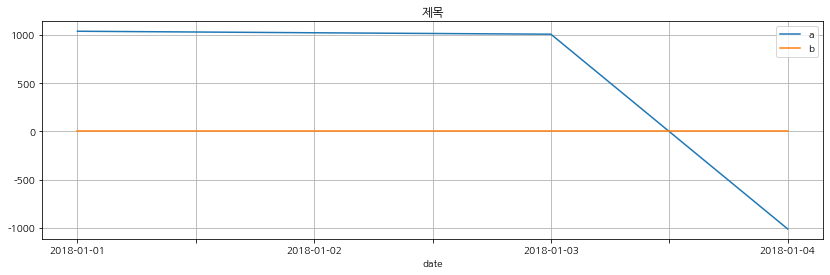

                  a    b
date                    
2018-01-01  1038.23  0.0
2018-01-02  1022.43  0.0
2018-01-03  1007.49  0.0
2018-01-04 -1010.94  0.0


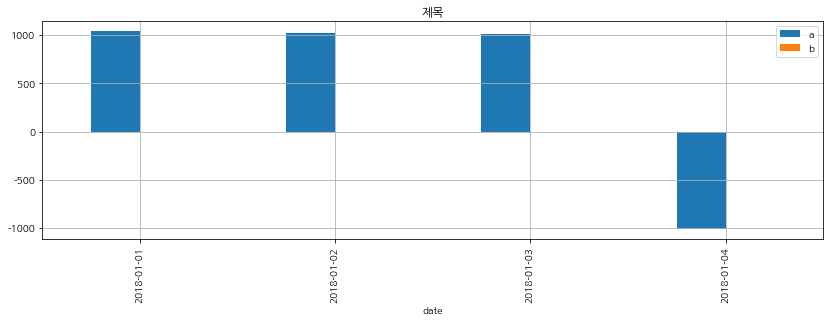

                  a    b        c
date                             
2018-01-01  1038.23  0.0  1005.69
2018-01-02  1022.43  0.0  -957.14
2018-01-03  1007.49  0.0   957.14
2018-01-04 -1010.94  0.0   942.59
date
2018-01-01    175.0
2018-01-02    238.9
2018-01-03    657.9
2018-01-04     10.0
Name: d, dtype: float64


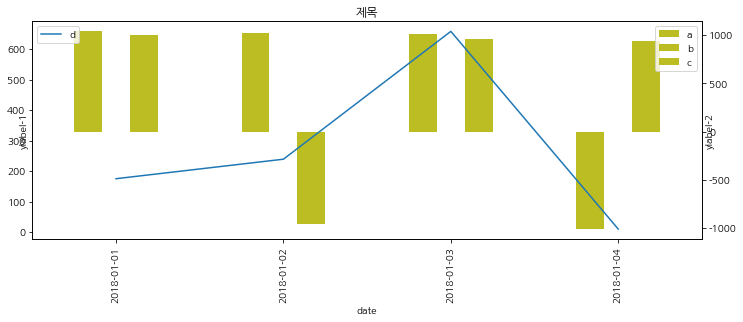

In [13]:
temp = pd.DataFrame({
#                      'a': [350, 400, 500, 600],
#                      'b': [-171, 151, 111, 131],
#                      'c': [155, 255, 355, 455],
#                      'd': [175.0, 238.9, 657.9, 10],
#                      'date':pd.date_range('2018-01-01',periods=4)
                     'a': [1038.23, 1022.43, 1007.49, -1010.94],
                     'b': [0.0, 0.0, 0.0, 0.0],
                     'c': [1005.69, -957.14, 957.14, 942.59],
                     'd': [175.0, 238.9, 657.9, 10],
                     'date':pd.date_range('2018-01-01',periods=4)
#                      'date':['01-18','02-18','03-18','04-18'] 
#                      'date':['2018-01-01','2018-01-02','2018-01-03','2018-01-04'] 
                })
# ----------------------------------------------------------------
## plot lib 버그 : x축에 날짜타입이 올 경우 혼합차트 못그린다.
# ----------------------------------------------------------------
temp['date'] = temp['date'].dt.strftime('%Y-%m-%d')
# temp['date']  = pd.to_datetime(temp['date'] , format='%Y-%m-%d', errors='raise')
temp = temp.set_index('date')
print(temp.info())
print(temp.head())

myplot(temp[['a','b']])
myplot(temp[['a','b']], kind='bar')
myplotmix(temp[['a','b','c']], temp[['c,d']]) #, 'y-left','y-right',kind1='line', kind2='line', title='제목')


* 증감율 = 증가액 / 이전가 * 100 
* 지수화 : 비교 대상들의 수치를 같은 기준으로 통일한 후 비교 
* 가격지수 = (Price(대상일 주가) / Price(기준일 주가)) * 기준가

      외환보유액_억달러  외환보유액대비단기채무_비율  외환보유액_전년도  외환보유액_증감   외환보유액_증감률
년도                                                              
1995          0           175.0        NaN       NaN         NaN
1996          0           238.9        0.0       0.0         NaN
1997         89           657.9        0.0      89.0         inf
1998        485            74.2       89.0     396.0  444.943820
1999        741            52.0      485.0     256.0   52.783505
2000        962            45.5      741.0     221.0   29.824561
2001       1028            34.3      962.0      66.0    6.860707
       외환보유액_증감률  외환보유액대비단기채무_비율
년도                              
1995         NaN           175.0
1996         NaN           238.9
1997         inf           657.9
1998  444.943820            74.2
1999   52.783505            52.0


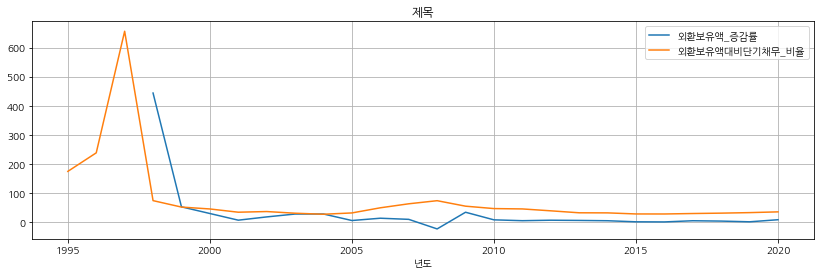

In [14]:
temp = df[['외환보유액_억달러', '외환보유액대비단기채무_비율']]
temp['외환보유액_전년도'] = temp['외환보유액_억달러'].shift(1) 
temp['외환보유액_증감'] = temp['외환보유액_억달러'] - temp['외환보유액_전년도']
# 증가액 / 이전가 * 100 
temp['외환보유액_증감률'] = temp['외환보유액_증감'] / temp['외환보유액_전년도'] * 100
# temp = temp.fillna(method='bfill') 
# temp = temp.fillna(method='ffill') 
# temp = temp.replace([np.inf, -np.inf], np.nan).fillna(0)
print(temp.head(7))
myplot(temp[['외환보유액_증감률', '외환보유액대비단기채무_비율']])
del temp

      외환보유액_억달러  외환보유액대비단기채무_비율
년도                             
1995          0           175.0
1996          0           238.9
1997         89           657.9
1998        485            74.2
1999        741            52.0
2000        962            45.5
2001       1028            34.3
       외환보유액_증감률  외환보유액대비단기채무_비율
년도                              
1995         NaN           175.0
1996         NaN           238.9
1997         inf           657.9
1998  444.943820            74.2
1999   52.783505            52.0


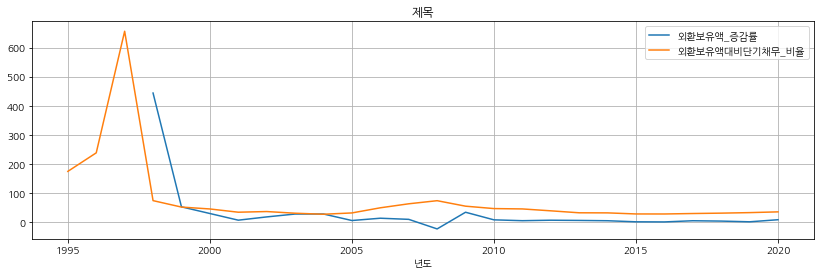

In [15]:
temp = df[['외환보유액_억달러', '외환보유액대비단기채무_비율']]
print(temp.head(7))
temp['외환보유액_증감률'] = df['외환보유액_억달러'].pct_change(periods=1) * 100   #------------------------------- 증감율 자동 계산
myplot(temp[['외환보유액_증감률', '외환보유액대비단기채무_비율']])
del temp

## 환율 및 외환 보유액

* ref: 한국은행 ECOS : 1995년 ~ 2020년 년별 주요 국가 정책금리현황
* 우리 원화와 외국통화의 교환비율로서 외국통화와 비교한 우리원화의 값어치를 나타냄
  -- 외국통화와 비교한 상대적 수치이므로 절대적인 해석 기준이 없다 
* 국가간 경상/자본거래와 거시경제변수에 지대한 영향을 미치는 개방경제하에서 거시경제 전반에 대한 판단과 예측의 지표로 활용
---

* 1997년 환율 급등 : 아시아 외환위기 영향
* 2008년 큰폭 상승 : 세계경제 침체 --> 경상수지, 외국인 주식 순매도 확인 필요
* 원/달러환율 대내외 요인 : 주요국 환율동향 , 정치.사회의 안정성, 외환수급동향(외국인 증권매수자금 등), 국제수지 등

---
* '원달러환율','원달러환율_전년대비변동률', '원엔환율', '원엔환율_전년대비변동률'

<pre>
'8.5.외환보유액합계천달러 원자료',
'8.5.외환보유액합계%전기대비증감률',

'8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)%전기대비증감률',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/위안(매매기준율)원 원자료',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/위안(매매기준율)%전기대비증감률',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)%전기대비증감률',


        8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료  \
날짜                                                     
2005-1                                       1038.23   
2005-2                                       1022.43   
2005-3                                       1007.49   
2005-4                                       1010.94   
2005-5                                       1002.21   

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/위안(매매기준율)원 원자료  \
날짜                                                   
2005-1                                         0.0   
2005-2                                         0.0   
2005-3                                         0.0   
2005-4                                         0.0   
2005-5                                         0.0   

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료  
날짜                                                  
2005-1                                     1005.69  
2005-2                                      974.84  
2005-3          

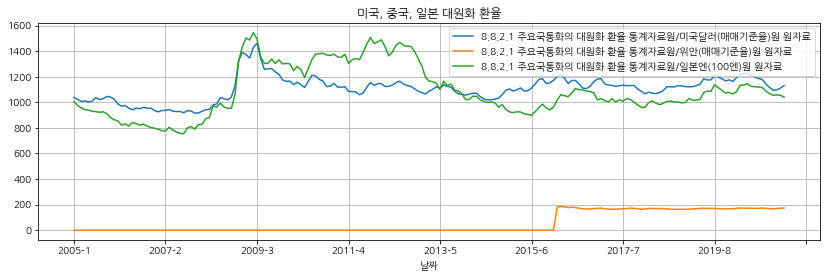

In [16]:
myplot(
ymdf[['8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료',
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/위안(매매기준율)원 원자료',
     '8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료'
]], title='미국, 중국, 일본 대원화 환율'
)

### 외환보유액 vs. 대외채권.대외채무
* 대외채권 : (+)일정시점 현재 거주자가 비거주자로부터 미래 특정시점에 원금 또는 이자를 회수하게 될 확정채권 잔액
* 대외채무 : (-)일정시점 현재 거주자가 비거주자에 대해 미래 특정시점에 원금 또는 이자를 지급해야 하는 확정채무 잔액
---
* '외환보유액_억달러', '외환보유액대비단기채무_비율', '대외채무_억달러', '단기채무_억달러', '대외채권_억달러','순채권_억달러'

      외환보유액_억달러  단기채무_억달러  외환보유액대비단기채무_비율  대외채권_억달러  대외채무_억달러  순채권_억달러
년도                                                                    
2014       3636      1164            32.0      6782      4243     2539
2015       3680      1043            28.3      7205      3961     3245
2016       3711      1048            28.2      7814      3822     3992
2017       3893      1160            29.8      8774      4120     4654
2018       4037      1256            31.1      9188      4412     4776
2019       4088      1345            32.9      9476      4670     4806
2020       4431      1575            35.5     10207      5424     4782


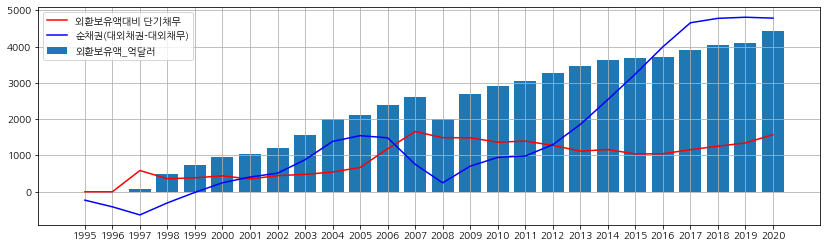

In [17]:
print(df[['외환보유액_억달러','단기채무_억달러','외환보유액대비단기채무_비율','대외채권_억달러', '대외채무_억달러', '순채권_억달러']].tail(7))
df['외환보유액대비단기채무_비율금액'] = df['외환보유액_억달러'] * df['외환보유액대비단기채무_비율'] / 100
plt.bar(df.index ,df['외환보유액_억달러'], label='외환보유액_억달러') 
plt.plot(df.index ,df['외환보유액대비단기채무_비율금액'] , label='외환보유액대비 단기채무', color='red') 
plt.plot(df.index ,df['순채권_억달러'] , label='순채권(대외채권-대외채무)', color='blue') 
plt.legend()
plt.show()

<pre><font color=green>
* <b>대외지급능력을 보다 정확히 파악하기 위해서는 '외환보유액 대비 단기채무' 잔액을 함께 비교</b>
* 만기 1년 이내 단기와 1년 이상 장기로 구분
* 2020년 4분기 대외채무잔액은 5,424억불로 전년대비 754억불 증가
* 2020년 4분기 단기외채(계약만기 1년 이하)는 1,575억불로 전년대비 230억불 증가

## 한국은행 기준금리 및 유동성
<pre>
'1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)십억원 원자료',
'1.5.1.2 Lf 상품별 구성내역(말잔,원계열)Lf(금융기관유동성) : 상품별(말잔,원계열)%전기대비증감률',

'2.1.한국은행 주요계정 (말잔)자산합계십억원 원자료',
'2.1.한국은행 주요계정 (말잔)자산합계%전기대비증감률',
'2.1.한국은행 주요계정 (말잔)부채합계십억원 원자료',
'2.1.한국은행 주요계정 (말잔)부채합계%전기대비증감률',
'2.5.한국은행 원화대출금(말잔)원화대출금(계)십억원 원자료',
'2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률',
'2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리연%원자료',
'2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률',

        2.1.한국은행 주요계정 (말잔)부채합계%전기대비증감률  2.1.한국은행 주요계정 (말잔)자산합계%전기대비증감률
날짜                                                                    
2005-1                          3.0393                          2.2761
2005-2                          2.1650                          2.1071
2005-3                          4.7613                          4.5011
2005-4                         -2.0723                         -2.1009
2005-5                          0.0303                          0.0343


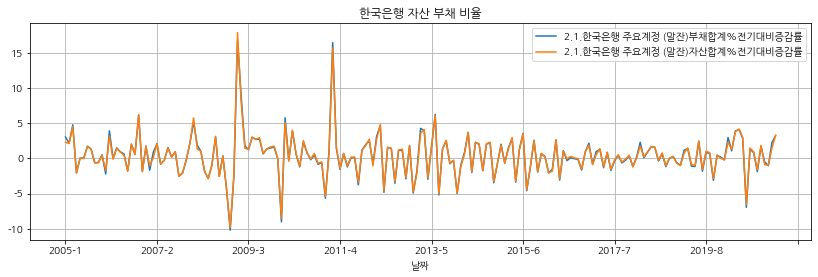

        2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률  \
날짜                                           
2005-1                              0.0511   
2005-2                             -2.7413   
2005-3                             -5.3634   
2005-4                              1.7899   
2005-5                              1.8567   

        2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률  
날짜                                              
2005-1                                     0.0  
2005-2                                     0.0  
2005-3                                     0.0  
2005-4                                     0.0  
2005-5                                     0.0  


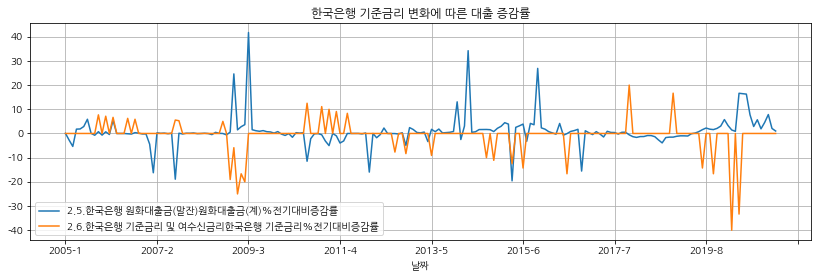

In [18]:
myplot(ymdf[[
'2.1.한국은행 주요계정 (말잔)부채합계%전기대비증감률',
'2.1.한국은행 주요계정 (말잔)자산합계%전기대비증감률',  
 ]]
 ,title='한국은행 자산 부채 비율')

myplot(ymdf[[
'2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률',
'2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률',   
 ]]
 ,title='한국은행 기준금리 변화에 따른 대출 증감률')

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료
날짜                                                  
2008-1                                        942.39
2008-2                                        944.69
2008-3                                        979.86
2008-4                                        986.66
2008-5                                       1036.73
        2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률  \
날짜                                           
2008-1                             -0.0780   
2008-2                             -0.0141   
2008-3                              0.0968   
2008-4                             -0.0312   
2008-5                             -0.4713   

        2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률  
날짜                                              
2008-1                                     0.0  
2008-2                                     0.0  
2008-3                                     0.0  
2008-4                                     0.0  
2008-5      

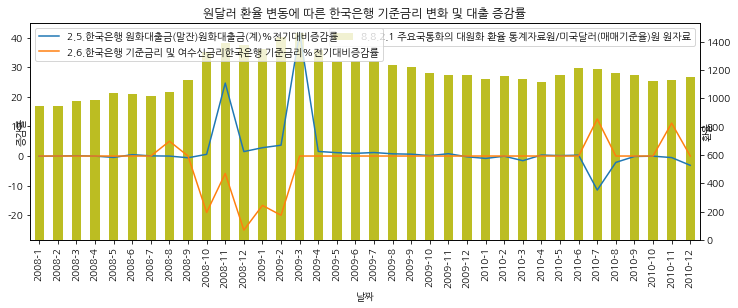

         8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료
날짜                                                 
2011-6                                      1342.81
2011-7                                      1333.36
2011-8                                      1391.35
2011-9                                      1456.48
2011-10                                     1508.22
        2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률  \
날짜                                           
2012-1                              0.0013   
2012-2                             -1.7623   
2012-3                             -0.4539   
2012-4                              2.2555   
2012-5                             -0.0165   

        2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률  
날짜                                              
2012-1                                     0.0  
2012-2                                     0.0  
2012-3                                     0.0  
2012-4                                     0.0  
2012-5             

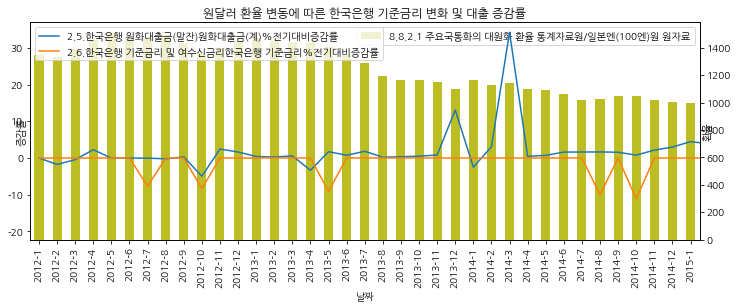

In [19]:
myplotmix(ymdf[[
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료']].iloc[36:72],    
ymdf[['2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률',
'2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률',   
 ]].iloc[36:72]
 ,title='원달러 환율 변동에 따른 한국은행 기준금리 변화 및 대출 증감률'
 ,y1='증감률'
 ,y2='환율'
)


myplotmix(ymdf[[
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료']].loc['2011-6':'2014-6'],    
ymdf[['2.5.한국은행 원화대출금(말잔)원화대출금(계)%전기대비증감률',
'2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리%전기대비증감률',   
 ]].loc['2012-1':'2015-6'],    
 title='원달러 환율 변동에 따른 한국은행 기준금리 변화 및 대출 증감률'
 ,y1='증감률'
 ,y2='환율'
)


## 주요 국가 별 중앙은행 정책금리
<pre>
'18.1.1.3 중앙은행 정책금리한국% 원자료',
'18.1.1.3 중앙은행 정책금리한국%전기대비증감률',
'18.1.1.3 중앙은행 정책금리중국% 원자료',
'18.1.1.3 중앙은행 정책금리중국%전기대비증감률',
'18.1.1.3 중앙은행 정책금리일본% 원자료',
'18.1.1.3 중앙은행 정책금리미국% 원자료',
'18.1.1.3 중앙은행 정책금리미국%전기대비증감률',


        18.1.1.3 중앙은행 정책금리한국% 원자료  18.1.1.3 중앙은행 정책금리중국% 원자료  \
날짜                                                             
2005-1                       3.25                       5.58   
2005-2                       3.25                       5.58   
2005-3                       3.25                       5.58   
2005-4                       3.25                       5.58   
2005-5                       3.25                       5.58   

        18.1.1.3 중앙은행 정책금리일본% 원자료  18.1.1.3 중앙은행 정책금리미국% 원자료  
날짜                                                            
2005-1                        0.0                       2.25  
2005-2                        0.0                       2.50  
2005-3                        0.0                       2.75  
2005-4                        0.0                       2.75  
2005-5                        0.0                       3.00  


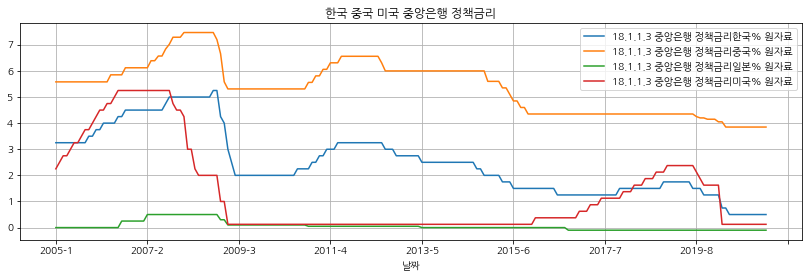

In [20]:
myplot(ymdf[[
'18.1.1.3 중앙은행 정책금리한국% 원자료',
'18.1.1.3 중앙은행 정책금리중국% 원자료',
'18.1.1.3 중앙은행 정책금리일본% 원자료',
'18.1.1.3 중앙은행 정책금리미국% 원자료',
 ]]
 ,title='한국 중국 미국 중앙은행 정책금리')


<pre><font color=green>
* 환율의 경우 달러와 엔이 유사한 변화를 보인다.
* 환율의 경우 위안과 유로의 환율이 전년동월대비 증감율이 유사한 상승폭을 보인다.

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료
날짜                                                  
2005-1                                       1038.23
2005-2                                       1022.43
2005-3                                       1007.49
2005-4                                       1010.94
2005-5                                       1002.21
        18.1.1.3 중앙은행 정책금리한국% 원자료  18.1.1.3 중앙은행 정책금리미국% 원자료
날짜                                                          
2005-1                       3.25                       2.25
2005-2                       3.25                       2.50
2005-3                       3.25                       2.75
2005-4                       3.25                       2.75
2005-5                       3.25                       3.00


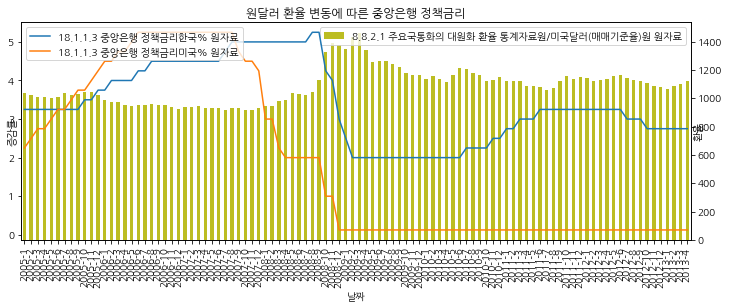

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료
날짜                                                  
2005-1                                       1038.23
2005-2                                       1022.43
2005-3                                       1007.49
2005-4                                       1010.94
2005-5                                       1002.21
        18.1.1.3 중앙은행 정책금리한국% 원자료  18.1.1.3 중앙은행 정책금리미국% 원자료
날짜                                                          
2005-1                       3.25                       2.25
2005-2                       3.25                       2.50
2005-3                       3.25                       2.75
2005-4                       3.25                       2.75
2005-5                       3.25                       3.00


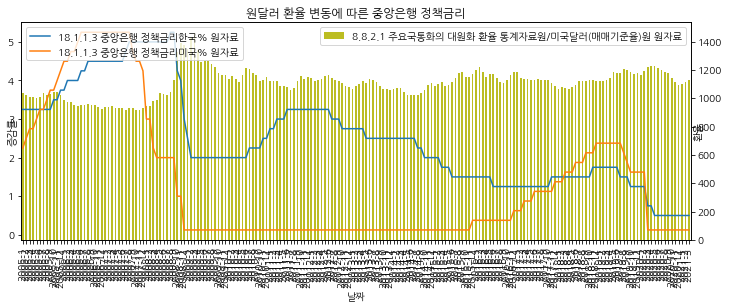

        8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료
날짜                                                
2005-1                                     1005.69
2005-2                                      974.84
2005-3                                      957.14
2005-4                                      942.59
2005-5                                      939.38
        18.1.1.3 중앙은행 정책금리한국% 원자료  18.1.1.3 중앙은행 정책금리미국% 원자료
날짜                                                          
2005-1                       3.25                       2.25
2005-2                       3.25                       2.50
2005-3                       3.25                       2.75
2005-4                       3.25                       2.75
2005-5                       3.25                       3.00


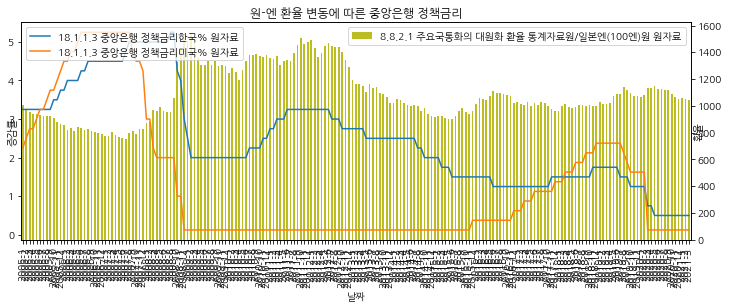

In [21]:
myplotmix(ymdf[[
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료']].iloc[:100],    
ymdf[[
'18.1.1.3 중앙은행 정책금리한국% 원자료',
'18.1.1.3 중앙은행 정책금리미국% 원자료',
 ]].iloc[:100],    
 title='원달러 환율 변동에 따른 중앙은행 정책금리'
 ,y1='증감률'
 ,y2='환율'
)


myplotmix(ymdf[[
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)원 원자료']],    
ymdf[[
'18.1.1.3 중앙은행 정책금리한국% 원자료',
'18.1.1.3 중앙은행 정책금리미국% 원자료',
 ]]
 ,title='원달러 환율 변동에 따른 중앙은행 정책금리'
 ,y1='증감률'
 ,y2='환율'
)


myplotmix(ymdf[[
'8.8.2.1 주요국통화의 대원화 환율 통계자료원/일본엔(100엔)원 원자료']],
ymdf[[
'18.1.1.3 중앙은행 정책금리한국% 원자료',
'18.1.1.3 중앙은행 정책금리미국% 원자료',
 ]],
 title='원-엔 환율 변동에 따른 중앙은행 정책금리'
 ,y1='증감률'
 ,y2='환율'
)


## 예금 은행 금리 및 유동성
* 통화량은 유동성을 측정하는 척도이며, 경제정책을 달성하기 위한 중간목표나 정보변수 등으로 활용
* 지표 수치가 증가할수록 통화량 (증감율)이 증가
---
* M1(협의통화): 현금 및 예금 금액 (당장 사용 가능한 돈)
* M2(광의통화): 2년 미만 정기예금 (이자를 포기하고 써야 되는 돈)
* <b>Lf(금융기관유동성) : M2+2년이상 금융상품</b>
* L(광의유동성): M3+채권과 어음
---
* '통화량_Lf평잔', '통화량_Lf평잔증가율', '통화량_M2평잔', '통화량_M2평잔증가율','통화량_M1평잔', '통화량_M1평잔증가율', '통화량_본원통화평잔', '통화량_본원통화평잔증가율'

<pre>
'3.2.예금은행 자금별 대출금(말잔)총대출금십억원 원자료',
'3.2.예금은행 자금별 대출금(말잔)총대출금%전기대비증감률',
'3.1.5 예금은행 총수신(말잔)수신합계십억원 원자료',
'3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률',
'3.2.예금은행 자금별 대출금(말잔)총대출금십억원 원자료.1',
'3.2.예금은행 자금별 대출금(말잔)총대출금%전기대비증감률.1',

In [41]:
ymdf[[
'3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률'
 ]].groupby(ymdf['년']).mean().head()

,3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률
년,
2005,0.645750
2006,0.840317
2007,0.610783
2008,1.092183
2009,0.327908


      3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률
년                                   
2005                        0.645750
2006                        0.840317
2007                        0.610783
2008                        1.092183
2009                        0.327908


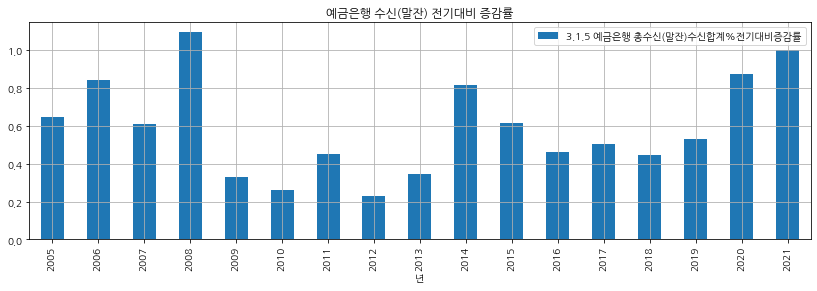

In [44]:
myplot(ymdf[['3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률']].groupby(ymdf['년']).mean()
 ,title='예금은행 수신(말잔) 전기대비 증감률', kind='bar')

      통화량_Lf평잔증가율
년도               
1995          0.0
1996          0.0
1997         16.3
1998         13.9
1999         11.3


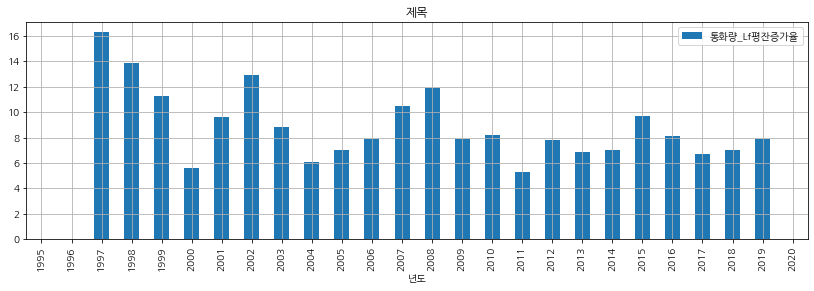

,통화량_Lf평잔,통화량_Lf평잔증가율,통화량_M2평잔,통화량_M2평잔증가율,통화량_M1평잔,통화량_M1평잔증가율,통화량_본원통화평잔,통화량_본원통화평잔증가율
년도,,,,,,,,
2016,3229.9,8.1,2342.6,7.3,734.4,15.4,137.4,13.9
2017,3445.7,6.7,2471.2,5.5,802.0,9.2,151.9,10.5
2018,3686.4,7.0,2626.9,6.3,841.0,4.9,165.0,8.6
2019,3979.1,7.9,2809.9,7.0,876.9,4.3,178.9,8.5
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
myplot(df[['통화량_Lf평잔증가율']], kind='bar')
df[['통화량_Lf평잔', '통화량_Lf평잔증가율', '통화량_M2평잔', '통화량_M2평잔증가율','통화량_M1평잔', '통화량_M1평잔증가율', '통화량_본원통화평잔', '통화량_본원통화평잔증가율']].tail()

      3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률
년                                   
2005                        0.645750
2006                        0.840317
2007                        0.610783
2008                        1.092183
2009                        0.327908
      통화량_Lf평잔증가율
년도               
1995          0.0
1996          0.0
1997         16.3
1998         13.9
1999         11.3


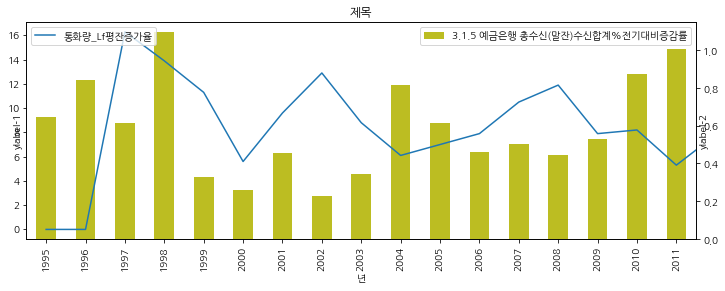

In [54]:
myplotmix(
ymdf[['3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률']].groupby(ymdf['년']).mean(),
df[['통화량_Lf평잔증가율']]
)

In [101]:
print(f"day: {df[['통화량_Lf평잔증가율']].index.min()}-{df[['통화량_Lf평잔증가율']].index.max()}")
# print(f"day: {ymdf[['기준금리']].index.min()}-{ymdf[['기준금리']].index.max()}")

day: 1995-2020


      2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리연%원자료  3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률  \
년                                                                           
2005                             3.333333                        0.645750   
2006                             4.229167                        0.840317   
2007                             4.729167                        0.610783   
2008                             4.729167                        1.092183   
2009                             2.041667                        0.327908   

      8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)%전기대비증감률  
년                                                      
2005                                        -0.205308  
2006                                        -0.828400  
2007                                         0.045500  
2008                                         3.420350  
2009                                        -1.289358  


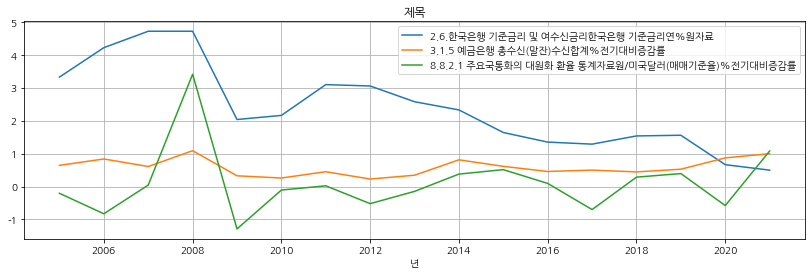

In [98]:
temp['3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률'] = ymdf[['3.1.5 예금은행 총수신(말잔)수신합계%전기대비증감률']].groupby(ymdf['년']).mean()
temp['2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리연%원자료'] = ymdf[['2.6.한국은행 기준금리 및 여수신금리한국은행 기준금리연%원자료']].groupby(ymdf['년']).mean()
temp['8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)%전기대비증감률'] = ymdf[['8.8.2.1 주요국통화의 대원화 환율 통계자료원/미국달러(매매기준율)%전기대비증감률']].groupby(ymdf['년']).mean()
myplot( temp
)

<pre><font color=green> 
* 예금은행의 총수신(말잔) 년간 수신합계-전기대비 증감률이 증가한다는 것은 시중 예금은행들이 시장에 대출을 많이 했음을 의미한다.
* Lf(금융기관유동성) : M2+2년이상 금융상품의 증감률이 증가한다는 것은 시장에 유동성이 늘어남을 의미한다. 
* 2020년 통화량 증가율(전년대비, 평잔기준) 7.9%
* 금리가 인상될 경우, 중앙은행은 시장의 유동성 확보를 위한 정책을 시행하고 이로 인해 시장의 유동성이 늘어난다.

### 가계신용동향
*'가계신용금액_조원', '가계신용금액_조원_전년동기증감액', '가계신용금액_조원_전년동기증감율', '가계대출금액_조원',
       '가계대출금액_조원_전년동기증감액', '가계대출금액_조원_전년동기증감율', '판매신용금액_조원',
       '판매신용금액_조원_전년동기증감액', '판매신용금액_조원_전년동기증감율', '년'

## 생산자 & 소비자 물가지수

* '생산자물가총지수(2015=100)', '생산자물가총지수(2015=100)_전년동월비', '소비자물가총지수(2015=100)',
       '소비자물가총지수(2015=100)_전년동월비', '소비자물가_근원물가_전년동월비', '소비자물가_생활물가_전년동월비',
       
<pre>
'7.1.1 생산자물가지수(기본분류)(2015=100)총지수2015=100원자료',
'7.1.1 생산자물가지수(기본분류)(2015=100)총지수%전기대비증감률',
'7.1.2 생산자물가지수(특수분류)(2015=100)총지수2015=100원자료',
'7.1.2 생산자물가지수(특수분류)(2015=100)총지수%전기대비증감률',
'7.4.1 소비자물가지수(2015=100)(전국)총지수2015=100원자료',
'7.4.1 소비자물가지수(2015=100)(전국)총지수%전기대비증감률',
'7.4.2 소비자물가지수(2015=100)(전국,특수분류)총지수2015=100원자료',
'7.4.2 소비자물가지수(2015=100)(전국,특수분류)총지수%전기대비증감률',

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1995 to 2020
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   외환보유액_억달러                 26 non-null     int64  
 1   외환보유액대비단기채무_비율            26 non-null     float64
 2   대외채무_억달러                  26 non-null     int64  
 3   단기채무_억달러                  26 non-null     int64  
 4   대외채권_억달러                  26 non-null     int64  
 5   순채권_억달러                   26 non-null     int64  
 6   통화량_Lf평잔                  26 non-null     float64
 7   통화량_Lf평잔증가율               26 non-null     float64
 8   통화량_M2평잔                  26 non-null     float64
 9   통화량_M2평잔증가율               26 non-null     float64
 10  통화량_M1평잔                  26 non-null     float64
 11  통화량_M1평잔증가율               26 non-null     float64
 12  통화량_본원통화평잔                26 non-null     float64
 13  통화량_본원통화평잔증가율             26 non-null     float64
 14  경상_경상수지_백만불 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '2016'),
  Text(0.0, 0, '1995'),
  Text(5.0, 0, '2000'),
  Text(10.0, 0, '2005'),
  Text(15.0, 0, '2010'),
  Text(20.0, 0, '2015'),
  Text(25.0, 0, '2020'),
  Text(30.0, 0, '')])

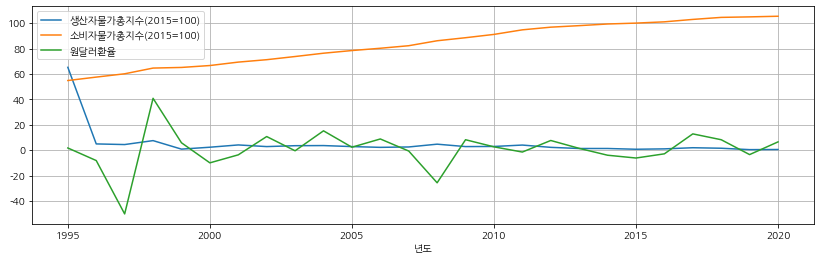

In [106]:
df['생산자물가총지수(2015=100)'].plot(label='생산자물가총지수(2015=100)')
df['소비자물가총지수(2015=100)'].plot(label='소비자물가총지수(2015=100)')
df['원달러환율_전년대비변동률'].plot(label='원달러환율')
plt.legend()
plt.xticks()


## 경상수지
* 상품수지 : 상품수출과 수입의 차이로서 소유권이전 기준으로 작성되며 가격조건은 수출입 모두 FOB로 평가- 일반상품, 가공용재화, 비화폐용금수지로 세분
* 서비스수지 : 서비스수출과 수입의 차이로서 운수, 여행, 통신서비스, 보험서비스, 특허권등 사용료, 사업서비스, 정부서비스 및 기타수지로 세분
* 소득수지 : 비거주자 노동자에게 지급되는 급료 및 임금, 대외금융자산 및 부채와 관련된 투자소득이 포함
* 경상이전수지 : 개인송금, 국제기구 출연금 및 구호를 위한 식량, 의약품 등의 무상원조가 포함

### 무역수지 
* 수출액(통관기준)과 수입액(통관기준)의 차이    

### 수출입 동향
* '무역수지_백만불', '수출억불', '(전년동월대비_수출_증감률)', '수입억불', '(전년동월대비_수입_증감률)', '무역수지억불',
---
'경상_경상수지_백만불', '경상_상품수지_백만불', '경상_서비스수지_백만불', '경상_본원소득수지_백만불', '경상_이전소득수지_백만불'

<pre>
'8.4.1 수출금액지수총지수2015=100원자료',
'8.4.1 수출금액지수총지수%전기대비증감률',
'8.4.3 수입금액지수총지수2015=100원자료',
'8.4.3 수입금액지수총지수%전기대비증감률',


'8.1.1 국제수지경상수지백만달러 원자료',
'8.1.1 국제수지경상수지%전기대비증감률',
'8.1.1 국제수지자본수지백만달러 원자료',
'8.1.1 국제수지자본수지%전기대비증감률',
'8.1.1 국제수지금융계정백만달러 원자료',
'8.1.1 국제수지금융계정%전기대비증감률',

##### 수출/수입

In [ ]:
df['수출_백만달러_기증감율'].plot(label='수출_백만달러_기증감율')
df['수입_맥만달러_기증감율'].plot(label='수입_맥만달러_기증감율')
plt.legend()
plt.show()

## 거시경제 분석 지표
<pre>
'17.거시경제분석 지표  경제성장률% 원자료',
'17.거시경제분석 지표  총저축률% 원자료',
'17.거시경제분석 지표  국내총투자율% 원자료',
'17.거시경제분석 지표  실업률% 원자료',
'17.거시경제분석 지표  실업률%전기대비증감률',
'17.거시경제분석 지표  생산자물가등락률% 원자료',
'17.거시경제분석 지표  생산자물가등락률%전기대비증감률',
'17.거시경제분석 지표  소비자물가등락률% 원자료',
'17.거시경제분석 지표  소비자물가등락률%전기대비증감률',
'17.거시경제분석 지표  근원인플레이션율% 원자료',
'17.거시경제분석 지표  근원인플레이션율%전기대비증감률',
'17.거시경제분석 지표  수출물가등락률% 원자료',
'17.거시경제분석 지표  수출물가등락률%전기대비증감률',
'17.거시경제분석 지표  수입물가등락률% 원자료',
'17.거시경제분석 지표  수입물가등락률%전기대비증감률',
'17.거시경제분석 지표    아파트매매가격등락률(서울)% 원자료',
'17.거시경제분석 지표    아파트매매가격등락률(서울)%전기대비증감률',
'17.거시경제분석 지표  WTI 현물유가등락률% 원자료',
'17.거시경제분석 지표  WTI 현물유가등락률%전기대비증감률',
'17.거시경제분석 지표  Lf(평잔)증감률% 원자료',
'17.거시경제분석 지표  Lf(평잔)증감률%전기대비증감률',
'17.거시경제분석 지표  CD(91일)수익률연%원자료',
'17.거시경제분석 지표  CD(91일)수익률%전기대비증감률',
'17.거시경제분석 지표  국고채(3년)수익률연%원자료',
'17.거시경제분석 지표  국고채(3년)수익률%전기대비증감률',
'17.거시경제분석 지표  종합주가지수1980.01.04=100 원자료',
'17.거시경제분석 지표  종합주가지수%전기대비증감률',
'17.거시경제분석 지표  경상수지백만달러 원자료',
'17.거시경제분석 지표  경상수지%전기대비증감률',
'17.거시경제분석 지표  외환보유액천달러 원자료',
'17.거시경제분석 지표  외환보유액%전기대비증감률',

## 주가
<pre>
'6.1.3 투자자별 주식거래매도 1)백만원 원자료',
'6.1.3 투자자별 주식거래매도 1)%전기대비증감률',
'6.1.3 투자자별 주식거래매수 1)백만원 원자료',
'6.1.3 투자자별 주식거래매수 1)%전기대비증감률',


In [ ]:
df['KOSPI주가지수_기증감율'].plot(label='KOSPI')
df['DJ주가지수_기증감률'].plot(label='DJ')
df['NK주가지수_기증감율'].plot(label='NK')
df['SH주가지수_기증감율'.plot(label='SH')
plt.legend()
plt.xticks()


* 주가의 경우 다우존스와 니케이 지수가 유사한 변화를 보인다
* 주가의 경우 코스피와 상해증시 지수가 유사한 변화를 보인다

### 외국인 직접투자 동향
* '외국인_보유금액_조원', '유가증권시장_조원', '코스닥시장_조원', '시가총액대비_외국인_보유금액_비율','시가총액대비_유가증권시장_비율', '시가총액대비_코스닥시장_비율', '외국인 직접투자_백만불', '해외직접투자건수', '해외직접투자금액_억불',

###  

###  